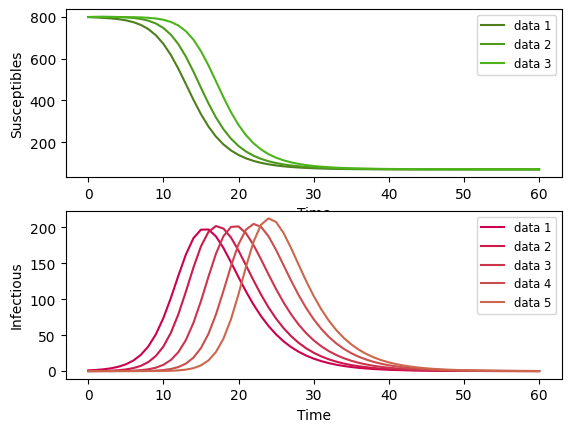

In [1]:
#!/usr/bin/env python

####################################################################
###    This is the PYTHON version of program 7.2 from page 242 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
### #
### It is the SIR epidemic in a metapopulationFor simplicity births#
### and deaths have been ignored, and we work with numbers of      #
### individuals.                                                   #
### Y[i][j] refers to infected individual who are currently in i   #
### but live in j..                                                #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties as fmp

n = 5    # Number of subpopulations
beta = 1.0*np.ones(n)  # vector of infection rates with lenght n
gamma = 0.3*np.ones(n)  # vector of removal or recovery rates with lenght n

# Xij represents the number of susceptibles in subpopulation i that live in subpopulation j
# Yij represents the number of infected in subpopulation i that live in subpopulation j
# Nij represents the number of total hosts currently in subpopulation i that live in subpopulation j


# vector of size n*n where N0_ij is the number of individuals in each spatial class
N0 = np.zeros(n*n)
# is the initial number of susceptible individuals in each spatial class; X(0) is a vector of size n × n.
X0 = np.zeros(n*n)
for i in np.arange(0, n*n, n+1):
    N0[i] = 1000.0
    X0[i] = 800.0

Y0 = np.zeros(n*n)
Y0[0] = 1.0
ND = MaxTime = 60.
TS = 1.0

l = np.zeros((n, n))
r = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if abs(i-j) == 1:
            l[i][j] = 0.1
r = 2*np.ones((n, n))
r = r-np.diag(np.diag(r))#putting 0 in the diagonal of the r matrix by extracting the diagonal and subtracting it from the matrix


INPUT0 = np.hstack((X0, Y0, N0))#The numpy.hstack() function takes the arrays X0, Y0, N0 and stacks them horizontally to make a single array of (n*n,3). 
INPUT = np.zeros((3*n*n))
for i in range(n*n):
    INPUT[3*i] = INPUT0[i]
    INPUT[1+3*i] = INPUT0[n*n+i]
    INPUT[2+3*i] = INPUT0[2*n*n+i]


def diff_eqs(y, t):
    '''The main set of equations'''
    Y = np.zeros((3*n*n))
    V = y
    sumY = np.zeros(n)
    sumN = np.zeros(n)

    # Calculate number currently in Subpopulation i
    for i in range(n):
        sumY[i] = 0.0
        sumN[i] = 0.0
        for j in range(n):
            k = 3*(j+i*n)
            sumN[i] += V[2+k]
            sumY[i] += V[1+k]

    # Set all rates to zeros
    for i in range(n):
        for j in range(n):
            k = 3*(j+i*n) #first compute i*n, then add j
            Y[k] = 0
            Y[1+k] = 0
            Y[2+k] = 0

    for i in range(n):
        for j in range(n):
            # Calculate the rates
            k = 3 * (j+i*n) #first compute i*n, then add j
            K = 3 * (i+j*n) #first compute j*n, then add i
            h = 3 * (i+i*n) #first compute i*n, then add i
            H = 3 * (j+j*n) #first compute j*n, then add j

            Y[k] -= (beta[i]*V[k]*(sumY[i]/sumN[i])) # Xii and Xij
            Y[k+1] += (beta[i]*V[k]*(sumY[i]/sumN[i])) # Yii and Yij
            Y[k+1] -= (gamma[i]*V[k+1]) # Yii and Yij

            # Movement
            Y[h] += r[j][i]*V[K]
            Y[h] -= l[j][i]*V[h]

            Y[h+1] += r[j][i]*V[K+1]
            Y[h+1] -= l[j][i]*V[h+1]

            Y[h+2] += r[j][i]*V[K+2]
            Y[h+2] -= l[j][i]*V[h+2]

            Y[k] += l[i][j]*V[H]
            Y[k] -= r[i][j]*V[k]

            Y[1+k] += l[i][j]*V[1+H]
            Y[1+k] -= r[i][j]*V[1+k]

            Y[2+k] += l[i][j]*V[2+H]
            Y[2+k] -= r[i][j]*V[2+k]
    return Y   # For odeint


t_start = 0.0
t_end = ND
t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
t_course = spi.odeint(diff_eqs, INPUT, t_range)
tc = t_course

# Plotting
totalS = np.zeros((len(tc), 5))
totalI = np.zeros((len(tc), 5))

for i in range(n):
    for j in range(n):
        k = 3*(j+i*n)
        totalS[:, i] += tc[:, k]
        totalI[:, i] += tc[:, k+1]


# print len(totalS)
pl.subplot(211)
for i in range(5):
    pl.plot(t_range, totalS[:, i], label=('data %s' %
            (i+1)), color=(0.3, i/10.+0.5, 0.1))
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.legend(loc=1, prop=fmp(size='smaller'))
pl.subplot(212)
for i in range(5):
    pl.plot(t_range, totalI[:, i], label=('data %s' %
            (i+1)), color=(0.8, i/10.+0., 0.3))
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.legend(loc=1, prop=fmp(size='smaller'))

pl.show()
